In [1]:
import os
from functools import reduce
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
#from math import log, floor
#import csv
import requests
import json
#from collections import deque
import numpy as np
#from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
from config import apikey
from config import ckey
#from chart_studio import plotly as py
import plotly.graph_objects as go
import scipy.stats as sts
import statistics as sta

In [2]:
# Call congress info
version =  'v1'
response = requests.get(
    'https://api.propublica.org/congress/v1/117/senate/members.json',
    headers={'X-API-Key': apikey},
).content

data = json.loads(response)

members = data['results'][0]['members']

# For Debug only,  comment out
#for member in members:
#    print(member['last_name'], member['state'], member['party'])

membersdf = pd.DataFrame(members)
stategrpcts = membersdf.groupby(['state','party'])['party'].count()


In [3]:
# new_df = membersdf[membersdf['state'] == 'CA']
# new_df.head()
# membersdf.head()
stategrpcts.head()

state  party
AK     R        2
AL     R        2
AR     R        2
AZ     D        2
CA     D        3
Name: party, dtype: int64

In [4]:
states = membersdf['state'].unique()
print(len(states))

50


In [5]:
## Assign Value for each state based on party 
party_df = stategrpcts.unstack()

#Create a series with the map 
# party_df['Color'] = party_df.D.map(lambda x: 'Blue' if x >= 2 else "")
# blue_party_series = party_df[party_df['Color'] == 'Blue']['Color']

# party_df['Color'] = party_df.R.map(lambda x: 'Red' if x >= 2 else "")
# red_party_series = party_df[party_df['Color'] == 'Red']['Color']

# party_df['Color'] = party_df.ID.map(lambda x: 'White' if x >= 2 else "")
# white_party_series = party_df[party_df['Color'] == 'White']['Color']

# complete_party_df = pd.concat([blue_party_series, red_party_series, white_party_series])

# WHERE WE LEFT OFF --> Finish putting purple into series 
#party_df['Color'] = party_df[~party_df.index.isin(complete_party_df)].map(lambda x: 'Purple')
#party_df
# purple_party_series = party_df[]

# complete_party_df
# party_df['Color'] = party_df.ID.map(lambda x: 'White' if x >= 2 else "")
# party_df
# new_df = df.loc[df[“column”] == “unique variable”, :]
party_df.head()

party,D,ID,R
state,,,
AK,NaN,NaN,2.0
AL,NaN,NaN,2.0
AR,NaN,NaN,2.0
AZ,2.0,NaN,NaN
CA,3.0,NaN,NaN


In [6]:
def polColor(dem, ind, rep):
    if dem >= 2 :
        color='blue'
    elif ind >= 2 :
        color='white'
    elif rep >= 2 :
        color='red'
    else:
        color='purple'
    return color

party_df['Color'] = party_df.apply(lambda x: polColor(x['D'], x['ID'], x['R']), axis=1)
party_df.head()

party,D,ID,R,Color
state,,,,
AK,NaN,NaN,2.0,red
AL,NaN,NaN,2.0,red
AR,NaN,NaN,2.0,red
AZ,2.0,NaN,NaN,blue
CA,3.0,NaN,NaN,blue


In [7]:
statecolor = party_df['Color']
statecolor

state
AK       red
AL       red
AR       red
AZ      blue
CA      blue
CO      blue
CT      blue
DE      blue
FL       red
GA      blue
HI      blue
IA       red
ID       red
IL      blue
IN       red
KS       red
KY       red
LA       red
MA      blue
MD      blue
ME    purple
MI      blue
MN      blue
MO       red
MS       red
MT    purple
NC       red
ND       red
NE       red
NH      blue
NJ      blue
NM      blue
NV      blue
NY      blue
OH    purple
OK       red
OR      blue
PA    purple
RI      blue
SC       red
SD       red
TN       red
TX       red
UT       red
VA      blue
VT    purple
WA      blue
WI    purple
WV    purple
WY       red
Name: Color, dtype: object

In [8]:
# Call covid info
version =  'v1'
response = requests.get(
    'https://data.cdc.gov/resource/9mfq-cb36.json?created_at=2020-12-09T14:45:40.234'
).content

covid_data = json.loads(response)


coviddf = pd.DataFrame(covid_data)
coviddf.head()

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_cases,prob_cases,conf_death,prob_death
0,2020-12-08T00:00:00.000,NH,26623,807.0,279,566,0.0,0,2020-12-09T14:45:40.234,Not agree,Not agree,NaN,NaN,NaN,NaN
1,2020-12-08T00:00:00.000,FSM,0,0.0,0,0,0.0,0,2020-12-09T14:45:40.234,Agree,Agree,0.0,0,0.0,0
2,2020-12-08T00:00:00.000,DC,23589,270.0,0,701,0.0,0,2020-12-09T14:45:40.234,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-08T00:00:00.000,IN,392663,5385.0,0,6410,126.0,3,2020-12-09T14:45:40.234,Not agree,Agree,NaN,NaN,6109.0,301
4,2020-12-08T00:00:00.000,VI,1698,18.0,0,23,0.0,0,2020-12-09T14:45:40.234,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
coviddf.count()

submission_date    56
state              56
tot_cases          56
new_case           56
pnew_case          56
tot_death          56
new_death          56
pnew_death         56
created_at         56
consent_cases      51
consent_deaths     51
conf_cases         32
prob_cases         32
conf_death         33
prob_death         33
dtype: int64

In [10]:
covidstatesdf = coviddf[coviddf['state'].isin(states)][['state','tot_cases','tot_death']]
covidstatesdf.count()

state        46
tot_cases    46
tot_death    46
dtype: int64

In [11]:
covidstatesdf.head()

,state,tot_cases,tot_death
0,NH,26623,566
3,IN,392663,6410
5,NE,142603,1277
6,LA,254562,6652
7,RI,67067,1470


In [12]:
cvdcolor = pd.merge(covidstatesdf, statecolor, on='state')
cvdcolor.head()

,state,tot_cases,tot_death,Color
0,NH,26623,566,blue
1,IN,392663,6410,red
2,NE,142603,1277,red
3,LA,254562,6652,red
4,RI,67067,1470,blue


In [13]:
# Call congress info
version =  'v1'
response = requests.get(
    f'https://api.census.gov/data/2019/acs/acs1?key={ckey}&get=NAME,B01001_001E&for=state:*'
).content

data = json.loads(response)[1:]
statepop = pd.DataFrame(data, columns=['State','Population','State_id'])

statepop

,State,Population,State_id
0,Mississippi,2976149,28
1,Missouri,6137428,29
2,Montana,1068778,30
3,Nebraska,1934408,31
4,Nevada,3080156,32
5,New Hampshire,1359711,33
6,New Jersey,8882190,34
7,New Mexico,2096829,35
8,New York,19453561,36
9,North Carolina,10488084,37


In [14]:
state_abb = pd.read_csv('state-abbreviations.csv',encoding='utf-8')

state_abb.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [15]:
statepop = statepop.merge(state_abb, on='State')

statepop.head()

,State,Population,State_id,Abbreviation
0,Mississippi,2976149,28,MS
1,Missouri,6137428,29,MO
2,Montana,1068778,30,MT
3,Nebraska,1934408,31,NE
4,Nevada,3080156,32,NV


In [23]:
covidbystate = cvdcolor.merge(statepop,left_on='state', right_on='Abbreviation')
covidbystate['tot_cases'] = pd.to_numeric(covidbystate['tot_cases'])
covidbystate['Population'] = pd.to_numeric(covidbystate['Population'])
covidbystate['PercentInfected'] = (covidbystate['tot_cases'].astype(float)/covidbystate['Population'].astype(float))*100
covidbystate['PercentByDeaths'] = (covidbystate['tot_death'].astype(float)/covidbystate['Population'].astype(float))*100


covidbystate

,state,tot_cases,tot_death,Color,State,Population,State_id,Abbreviation,PercentInfected,PercentByDeaths
0,NH,26623,566,blue,New Hampshire,1359711,33,NH,1.957990,0.041626
1,IN,392663,6410,red,Indiana,6732219,18,IN,5.832594,0.095214
2,NE,142603,1277,red,Nebraska,1934408,31,NE,7.371919,0.066015
3,LA,254562,6652,red,Louisiana,4648794,22,LA,5.475872,0.143091
4,RI,67067,1470,blue,Rhode Island,1059361,44,RI,6.330892,0.138763
5,WI,448009,4054,purple,Wisconsin,5822434,55,WI,7.694531,0.069627
6,ME,14455,246,purple,Maine,1344212,23,ME,1.075351,0.018301
7,NC,404032,5605,red,North Carolina,10488084,37,NC,3.852296,0.053442
8,VA,267129,4281,blue,Virginia,8535519,51,VA,3.129616,0.050155
9,KY,205668,2102,red,Kentucky,4467673,21,KY,4.603470,0.047049


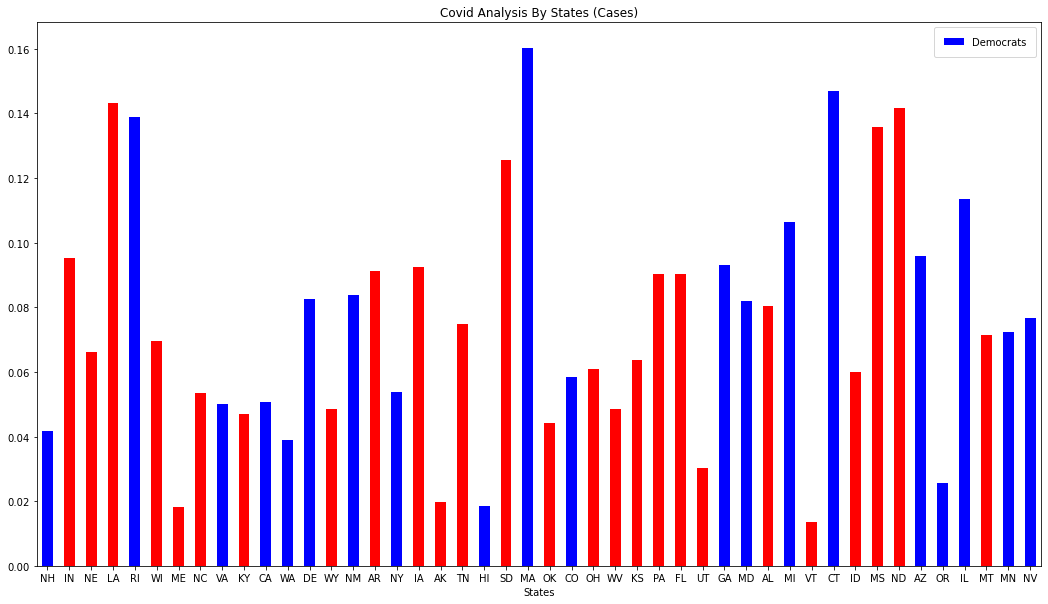

In [24]:
# Bar Graph - Percent By Cases 
    
percentInfected = covidbystate['PercentByDeaths']
states = covidbystate['state']

colors = ['blue' if (x == "blue") else 'red' for x in covidbystate["Color"]]

df = pd.DataFrame({'States':states, 'Percent of Population Infected':percentInfected})

ax = df.plot.bar(x='States', y='Percent of Population Infected', rot=0, figsize=(18, 10), width=0.5, color=colors)
# stacked bar charts 

plt.title("Covid Analysis By States (Cases)")
ax.legend(["Democrats", "Republicans"], borderpad=1);

plt.show()

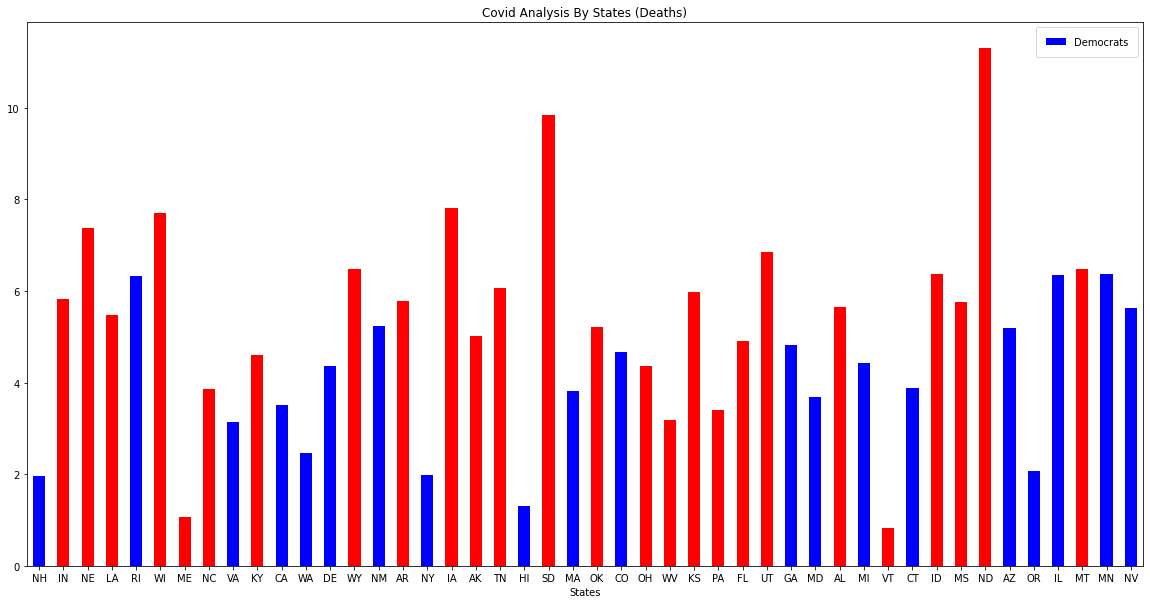

In [25]:
# Bar Graph - Percent By Deaths 
    
percentByDeaths = covidbystate['PercentInfected']
states = covidbystate['state']

colors = ['blue' if (x == "blue") else 'red' for x in covidbystate["Color"]]

df = pd.DataFrame({'States':states, 'Percent of Population Infected': percentByDeaths})
ax = df.plot.bar(x='States', y='Percent of Population Infected', rot=0, figsize=(20, 10), width=0.5, color=colors)
# stacked bar charts 

plt.title("Covid Analysis By States (Deaths)")
ax.legend(["Democrats", "Republicans"], borderpad=1);

plt.show()

In [26]:
stcolor = covidbystate['Color']

fig = go.Figure(data=go.Choropleth(
    locations=covidbystate['state'], # Spatial coordinates
    z = covidbystate['tot_cases'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    #color_discrete_map=[df.index, df['Color']],
    colorscale = 'Reds',
    colorbar_title = "Total Cases (Mil)",
))

fig.update_layout(
    title_text = 'Covid by State',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

In [27]:
#Population by State

fig = go.Figure(data=go.Choropleth(
    locations=covidbystate['state'], # Spatial coordinates
    z = covidbystate['Population'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    #color_discrete_map=[df.index, df['Color']],
    colorscale = 'Blues',
    colorbar_title = "Total Population (Mil)",
))

fig.update_layout(
    title_text = 'Covid by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [28]:
import plotly.express as px

fig = px.scatter(covidbystate,
    x="PercentInfected", y="tot_cases", size="Population", color="Color",
    log_x=True, size_max=60, title="gggg")
fig.show()

In [29]:
for xd, yd in zip(x_data, y_data):
        
        median = np.median(yd) # find the median
        color = 'rgb' + str(cmap(norm(median))[0:3]) # normalize
        
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=color,      # add the box plot color
            marker=dict(
                size=2,
            ),
            line=dict(width=1)
        ))

NameError: name 'x_data' is not defined

In [30]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="winner",
                    locations="district", featureidkey="properties.district",
                    projection="mercator", hover_data=["Bergeron", "Coderre", "Joly"]
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [31]:
df.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [32]:
red = covidbystate.loc[(covidbystate["Color"] == "red")]
blue  = covidbystate.loc[(covidbystate["Color"] == "blue")]

The following descriptive statistics are for the RED States
The mean is 0.07914064983681883
The median is 0.07481139007440725
The mode is 0.09521377721075325
The sample variance is 0.0013682223640798423
The population variance is 0.0012962106607072189
The standard deviation is 0.0369894899137558
The z-scores for Red states using the SciPy module are [-0.28471143  0.60378885 -0.49061184 -1.42774172 -0.9941629   0.08612137
 -0.31705925  0.86396776 -0.75102408 -0.14583673  2.0275555  -0.64639541
 -0.20341623 -0.81318068  0.30906963 -0.39440107  0.0277072  -0.323552
  2.87388305]


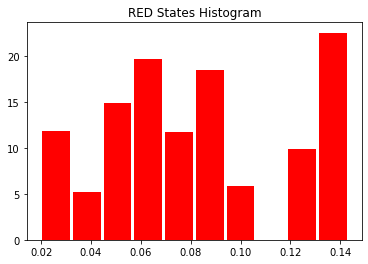

In [37]:
#RED

#The statistics module works on lists
rpiv = red['PercentByDeaths'].values.tolist()
rdbc = red['PercentByDeaths'].values.tolist()
# First, we will find the mean
redstates_mean = sta.mean(rpiv)

# The print statement outputs input to the screen
print("The following descriptive statistics are for the RED States")
print("The mean is", redstates_mean)

# Next, we find the median
redstates_median = sta.median(rpiv)
print("The median is", redstates_median) 

# The mode is the element that appears the most
redstates_mode = sta.mode(rpiv)
print("The mode is", redstates_mode) 

# The variance measures the spread of a distribution of data.  
redstates_svariance = sta.variance(rpiv) 
print("The sample variance is", redstates_svariance) 

redstates_popvariance = sta.pvariance(rpiv) 
print("The population variance is", redstates_popvariance) 

# The standard deviation, specifically, 
# it quantifies the spread or dispersion of a distribution. 
redstates_sstdev = sta.stdev(rpiv)
print("The standard deviation is", redstates_sstdev)

r_z_scipy = sts.zscore(red.PercentInfected)
print(f"The z-scores for Red states using the SciPy module are {r_z_scipy}")

# We plot the histogram and display it in the notebook
# plt.hist(rpiv, bins = 25, color = 'red')
plt.hist(rpiv, color = 'red', rwidth = .9, weights=red.PercentInfected)
plt.title('RED States Histogram')
plt.show()

The following descriptive statistics are for the BLUE States
The mean is 4.05916211314026
The median is 0.07481139007440725
The mode is 0.09521377721075325
The sample variance is 0.0013682223640798423
The population variance is 0.0012962106607072189
The standard deviation is 0.0369894899137558
The z-scores for Blue states using the SciPy module are [-1.38048464  1.49254195 -0.61071788 -0.35610091 -1.05065494  0.19339443
  0.77811089 -1.36584976 -1.81322151 -0.15473488  0.39740033  0.5030143
 -0.24724316  0.24797336 -0.11909532  0.74650282 -1.31040036  1.502573
  1.51775208  1.02924022]


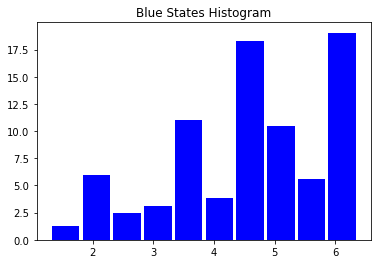

In [38]:
#BLUE

# The statistics module works on lists
bpiv = blue['PercentInfected'].values.tolist()
bdbc = blue['PercentByDeaths'].values.tolist()
# First, we will find the mean
bluestates_mean = sta.mean(bpiv)

# The print statement outputs input to the screen
print("The following descriptive statistics are for the BLUE States")
print("The mean is", bluestates_mean)

# Next, we find the median
bluestates_median = sta.median(rpiv)
print("The median is", bluestates_median) 

# The mode is the element that appears the most
bluestates_mode = sta.mode(rpiv)
print("The mode is", bluestates_mode) 

# The variance measures the spread of a distribution of data.  
bluestates_svariance = sta.variance(rpiv) 
print("The sample variance is", bluestates_svariance) 

bluestates_popvariance = sta.pvariance(rpiv) 
print("The population variance is", bluestates_popvariance) 

# The standard deviation, specifically, it quantifies the spread
# or dispersion of a distribution. 
bluestates_sstdev = sta.stdev(rpiv)
print("The standard deviation is", bluestates_sstdev)

r_z_scipy = sts.zscore(blue.PercentInfected)
print(f"The z-scores for Blue states using the SciPy module are {r_z_scipy}")

# We plot the histogram and display it in the notebook
plt.hist(bpiv, color = 'blue', rwidth = .9, weights=blue.PercentInfected)

plt.title('Blue States Histogram')
plt.show()

In [ ]:
sts.ttest_ind(rpiv, bpiv, equal_var = False)

In [ ]:
sts.ttest_ind(rdbc, bdbc, equal_var = False)